# Projet 10:  Détectez des faux billets 

## 1 Importation des packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn import metrics

## 2. Imporation du fichier csv 

In [2]:
df = pd.read_excel('billetss.xlsx')
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


## 3. Exploration et analyse descriptive 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [4]:
# Je vérifie s'il y'a des doublons 
df.duplicated().sum()

0

In [5]:
# Je vérifie s'il y'a des valeurs manquantes
df.isnull().sum()

is_genuine       0
diagonal         0
height_left      0
height_right     0
margin_low      37
margin_up        0
length           0
dtype: int64

In [6]:
# J'utilise la méthode groupby pour afficher les valeurs manquantes par catégorie de billet (vrai/faux)
df.groupby("is_genuine").count()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
False,500,500,500,492,500,500
True,1000,1000,1000,971,1000,1000


In [7]:
df.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
mean,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000
max,173.010000,104.880000,104.950000,6.900000,3.910000,114.44000


### 3.1 Nombre de vrais et faux billets

In [8]:
vrai_billet = df['is_genuine'].sum()
faux_billet = len(df) - vrai_billet

print("Nombre de vrais billets :", vrai_billet)
print("Nombre de faux billets :", faux_billet)

Nombre de vrais billets : 1000
Nombre de faux billets : 500


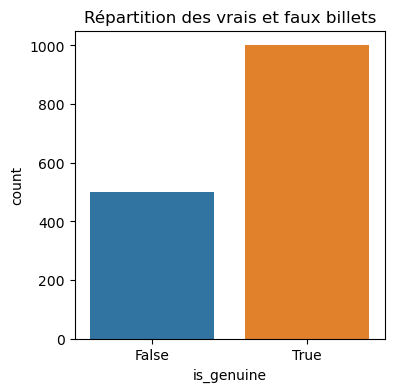

In [9]:
# Diagramme en barres pour "is_genuine"
plt.figure(figsize=(4,4))
sns.countplot(x="is_genuine", data=df)
plt.title('Répartition des vrais et faux billets')
plt.show()

### 3.2 Répartition des dimensions des vrais et faux billets

In [10]:
# Je crée le df faux billet et j'affiche sa description
False_b = df.loc[df["is_genuine"]==False]
False_b.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,500.000000,500.000000,500.000000,492.000000,500.000000,500.000000
mean,171.901160,104.190340,104.143620,5.215935,3.350160,111.630640
std,0.306861,0.223758,0.270878,0.553531,0.180498,0.615543
min,171.040000,103.510000,103.430000,3.820000,2.920000,109.490000
25%,171.690000,104.040000,103.950000,4.840000,3.220000,111.200000
50%,171.910000,104.180000,104.160000,5.190000,3.350000,111.630000
75%,172.092500,104.332500,104.320000,5.592500,3.472500,112.030000
max,173.010000,104.880000,104.950000,6.900000,3.910000,113.850000


In [11]:
# Je crée le df vrai billet et j'affiche sa description
True_b = df.loc[df["is_genuine"]==True]
True_b.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,1000.000000,1000.000000,1000.00000,971.000000,1000.00000,1000.000000
mean,171.987080,103.949130,103.80865,4.116097,3.05213,113.202430
std,0.300441,0.300231,0.29157,0.319124,0.18634,0.359552
min,171.040000,103.140000,102.82000,2.980000,2.27000,111.760000
25%,171.790000,103.740000,103.61000,3.905000,2.93000,112.950000
50%,171.990000,103.950000,103.81000,4.110000,3.05000,113.205000
75%,172.200000,104.140000,104.00000,4.340000,3.18000,113.460000
max,172.920000,104.860000,104.95000,5.040000,3.74000,114.440000


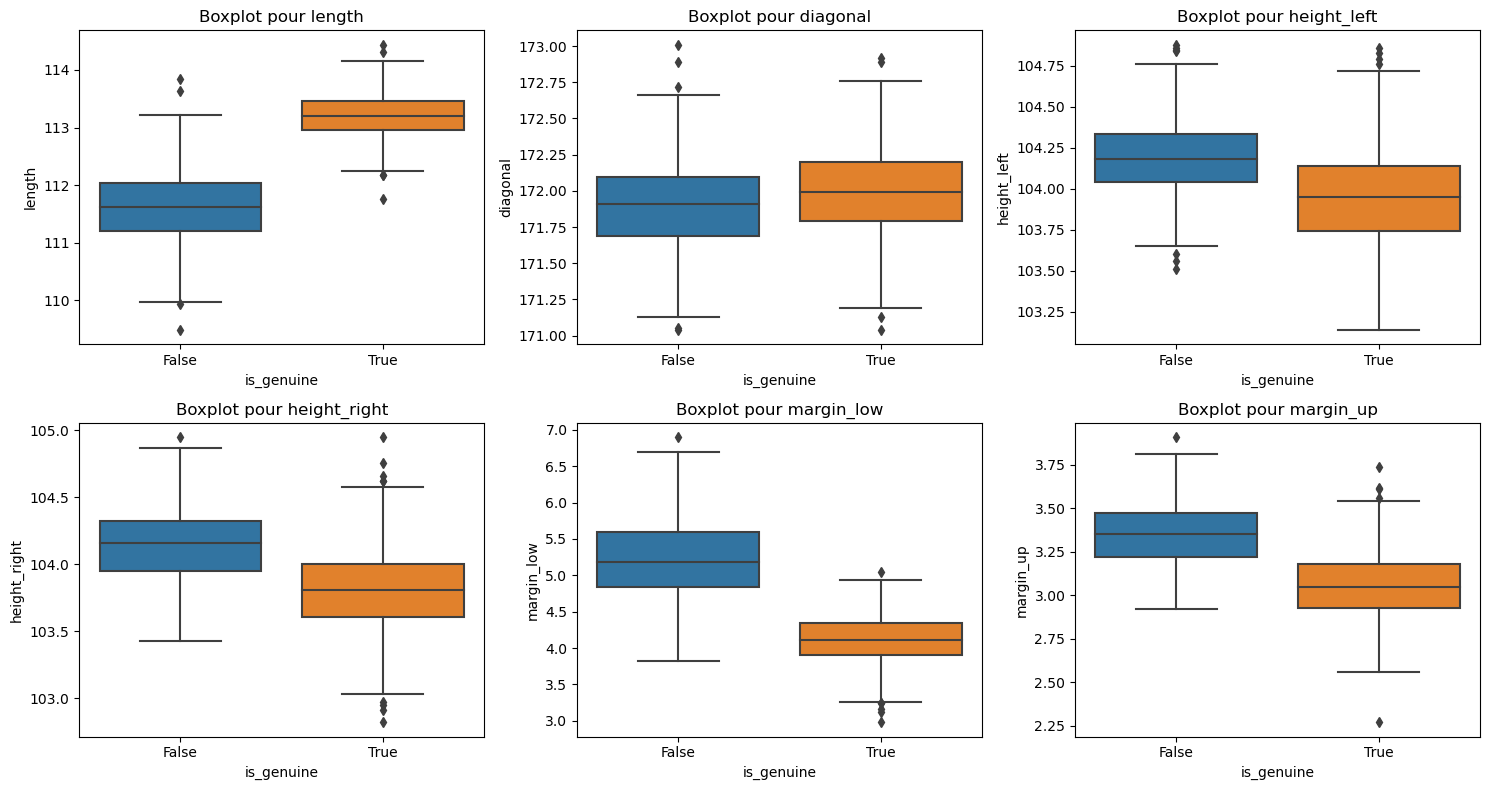

In [12]:
# J'utilise la boîte à moustache pour représenter visuellement la disperssion des données
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Boxplot pour 'length'
sns.boxplot(x='is_genuine', y='length', data=df, ax=axes[0, 0])
axes[0, 0].set_title("Boxplot pour length")
axes[0, 0].set_ylabel("length")

# Boxplot pour 'diagonal'
sns.boxplot(x='is_genuine', y='diagonal', data=df, ax=axes[0, 1])
axes[0, 1].set_title("Boxplot pour diagonal")
axes[0, 1].set_ylabel("diagonal")

# Boxplot pour 'height_left'
sns.boxplot(x='is_genuine', y='height_left', data=df, ax=axes[0, 2])
axes[0, 2].set_title("Boxplot pour height_left")
axes[0, 2].set_ylabel("height_left")

# Boxplot pour 'height_right'
sns.boxplot(x='is_genuine', y='height_right', data=df, ax=axes[1, 0])
axes[1, 0].set_title("Boxplot pour height_right")
axes[1, 0].set_ylabel("height_right")

# Boxplot pour 'margin_low'
sns.boxplot(x='is_genuine', y='margin_low', data=df, ax=axes[1, 1])
axes[1, 1].set_title("Boxplot pour margin_low")
axes[1, 1].set_ylabel("margin_low")

# Boxplot pour 'margin_up'
sns.boxplot(x='is_genuine', y='margin_up', data=df, ax=axes[1, 2])
axes[1, 2].set_title("Boxplot pour margin_up")
axes[1, 2].set_ylabel("margin_up")

plt.tight_layout()

plt.show()

#### Commentaire : 
Les boîtes à moustaches révèlent des différences marquées dans la dispersion des données entre les vrais et les faux billets, en particulier pour les variables 'length' et 'margin_low'. On observe visuellement une variation significative entre les valeurs minimales et maximales, ainsi qu'entre les quartiles Q1, Q3 et la médiane, ce qui suggère une divergence notable dans la distribution de ces variables par rapport aux autres.

<Figure size 600x800 with 0 Axes>

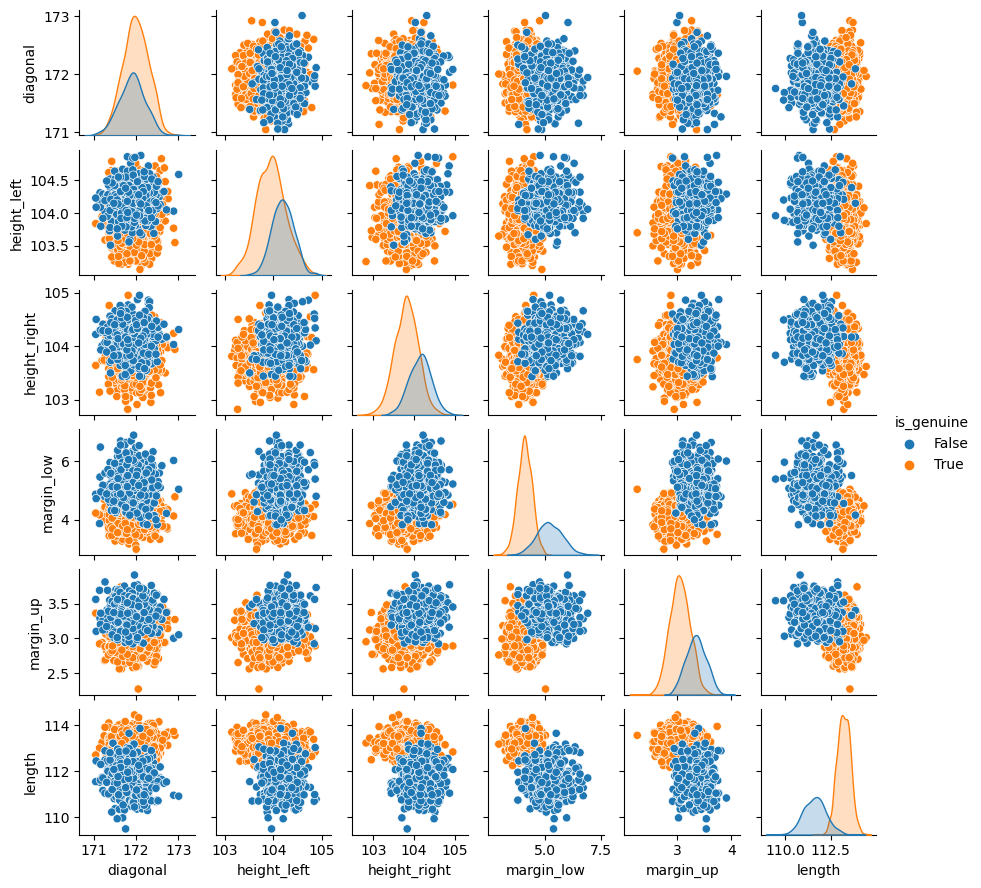

In [13]:
plt.figure(figsize=(6,8))
sns.pairplot(df, hue="is_genuine", height=1.5)

#### Commentaire :
Certaines variables, telles que 'margin_low' et 'length', se révèlent être des indicateurs distinctifs pour différencier les vrais des faux billets. En revanche, les variables 'diagonal', 'margin_up', 'height_left' et 'height_right' ne présentent pas de caractéristiques permettant de faire cette distinction.

### 3.3 Différence des dimensions entre vrais et faux billets

In [14]:
# Je calcule la différence entre les moyennes des vrais et des faux billets pour chaque dimension en faisant appel aux 2 df vrai et faux
dimensions = ['length', 'height_left', 'height_right', 'margin_up', 'margin_low', 'diagonal']

for dimension in dimensions:
    difference = round(True_b[dimension].mean() - False_b[dimension].mean(), 2)
    print(f"Différence {dimension} entre vrais et faux billets : {difference}")

Différence length entre vrais et faux billets : 1.57
Différence height_left entre vrais et faux billets : -0.24
Différence height_right entre vrais et faux billets : -0.33
Différence margin_up entre vrais et faux billets : -0.3
Différence margin_low entre vrais et faux billets : -1.1
Différence diagonal entre vrais et faux billets : 0.09


#### Les vrais billets ont une longueure et une diagonale plus élevées que les faux billets. 
#### Les faux billets ont  des marges et des hauteurs plus importantes que les vraix billets.

In [15]:
# Je calcule la matrice de corrélation
correlation_matrix = df.corr()
correlation_matrix

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,1.000000,0.132756,-0.379833,-0.485092,-0.783032,-0.606262,0.849285
diagonal,0.132756,1.000000,0.019472,-0.024492,-0.111534,-0.055649,0.097587
height_left,-0.379833,0.019472,1.000000,0.242279,0.302643,0.246522,-0.320863
height_right,-0.485092,-0.024492,0.242279,1.000000,0.391085,0.307005,-0.401751
margin_low,-0.783032,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.606262,-0.055649,0.246522,0.307005,0.431606,1.000000,-0.520575
length,0.849285,0.097587,-0.320863,-0.401751,-0.666753,-0.520575,1.000000


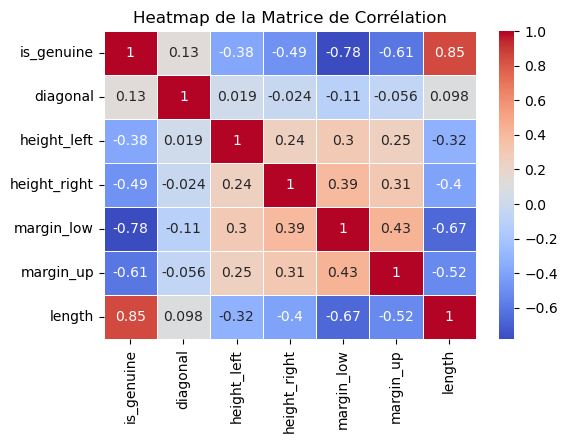

In [16]:
# J'affiche le résultat dans une heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap de la Matrice de Corrélation")
plt.show()

#### Commentaire:
La matrice de corrélation mesure la relation entre chaque paire de variables. Plus la valeur est proche de 1 (positif) ou -1 (négatif), plus la corrélation est forte. Une valeur proche de 0 indique une faible corrélation.

is_genuine vs length (0.85) : Forte corrélation positive. Les billets vrais ont tendance à avoir une longueur plus importante.

is_genuine vs margin_low (-0.78) : Forte corrélation négative. Les billets vrais ont tendance à avoir une marge inférieure plus petite.

length vs margin_low (-0.67) : Forte corrélation négative. Les billets plus longs ont tendance à avoir une marge inférieure plus petite.

## 4. Régression linéaire multiple
#### Remarque:
Pour remplacer les valeurs manquantes dans la variable 'margin_low', je vais utiliser une régression linéaire en utilisant les données des autres variables quantitatives pour prédire ces valeurs manquantes.

Des tests seront entrepris pour déterminer la pertinence d'affecter les valeurs prédites aux données manquantes. Ces tests permettront d'évaluer la qualité de la prédiction et de garantir la validité de l'imputation des valeurs manquantes dans la variable 'margin_low'.

In [17]:
# Je change le bool en binaire dans la variable 'is_genuine'
df["is_genuine"].replace([True, False], [1,0], inplace=True)

In [18]:
# Je commence par séparer les données en ensemble d'entraînement et ensemble de test 
ensemble_entrainement = df.dropna(subset=['margin_low'])
ensemble_test = df[df['margin_low'].isnull()]

# Je sélectionne les variables explicatives (X) et la variable cible  (y) 
X_entrainement = ensemble_entrainement[['is_genuine','diagonal','height_left','height_right','margin_up','length']] # Variables explicatives
y_entrainement = ensemble_entrainement['margin_low']  # Variable cible

# Je selectionne les mêmes variables explicatives que dans l'ensemble d'entraînement pour l'ensemble de test
X_test = ensemble_test[['is_genuine','diagonal','height_left','height_right','margin_up','length']]  

# Je crée le modèle de régression linéaire
modele_regression = LinearRegression()

# J'entraine le modèle sur l'ensemble d'entraînement
modele_regression.fit(X_entrainement, y_entrainement)

# Je prédis les valeurs manquantes dans l'ensemble de test et l'enregistre dans une variable
valeurs_predites = modele_regression.predict(X_test)

In [19]:
# Je calcule le R²
print('Le Coefficient de détermination est de :', round(modele_regression.score(X_entrainement, y_entrainement), 4))

Le Coefficient de détermination est de : 0.6169


#### Remarque: 

Le R² mesure la proportion de la variance de la variable 'margin_low' expliquée par le modèle.
Ici, le R² est de 0.6169 cela signifie que le modèle explique environ 61.69% de la variance dans la variable dépendante 'margin_low'.Cela indique un ajustement modéré du modèle, il ne capture pas la totalité de la variabilité, mais reste tout de même encourageant car il capture une part significative de la variation de 'margin_low'.  

In [20]:
valeurs_predites

array([4.06495361, 4.11199026, 4.13400328, 3.99357074, 4.1403993 ,
       4.09428392, 4.07412432, 4.12538999, 4.0807278 , 4.07363322,
       4.11897255, 4.18037978, 4.13648423, 4.05106842, 4.17837685,
       4.22555104, 4.11586845, 4.10284101, 4.08184346, 4.09276238,
       4.11250192, 4.15717623, 4.16028787, 4.12193808, 4.12353555,
       4.19842271, 4.10962313, 4.09696025, 4.13384101, 5.25968515,
       5.264817  , 5.28251853, 5.30206887, 5.20035843, 5.1754678 ,
       5.17345045, 5.24675055])

In [21]:
# J'utilise len() pour compter le nombre d'éléments 
nombre_d_elements = len(valeurs_predites)
print("Nombre d'éléments dans valeurs_predites :", nombre_d_elements)

Nombre d'éléments dans valeurs_predites : 37


In [22]:
# Je calcule la moyenne des valeurs prédites
print('La moyenne des valeurs prédites :',round(valeurs_predites.mean(),2))

La moyenne des valeurs prédites : 4.36


In [23]:
# Je calcule la moyenne de la variable 'margin_low' 
MOYENNE = round(df['margin_low'].mean(),2)
print('La moyenne de la variable "margin_low" avec les NAN est de :', MOYENNE)

La moyenne de la variable "margin_low" avec les NAN est de : 4.49


#### Remarque: 
Les résultats indiquent que la moyenne des valeurs prédites pour la variable 'margin_low' est de 4.36, tandis que la moyenne de la variable 'margin_low' avec les valeurs manquantes d'origine est de 4.49. La différence entre ces deux moyennes suggère qu'il peut y avoir une certaine variation entre les valeurs prédites et les valeurs manquantes d'origine.

La différence entre les moyennes pourrait être attribuable à l'erreur de prédiction de la régression linéaire. Avant de décider d'affecter les valeurs prédites aux valeurs manquantes, je vais réaliser des tests d'hypothèses pour évaluer la significativité de cette différence et la validité de l'imputation. 

## 5. Tests de validité du modèle de régression linéaire multiple
### 5.1 Test d'homoscédasticité : 
L'homoscédasticité signifie que la variance des erreurs résiduelles est constante à tous les niveaux de la variable prédite.(égalité des variances entre les résidus). 

In [24]:
from scipy.stats import levene

# Je supprime temporairement les lignes avec des valeurs manquantes pour le test de Levene
df_no_missing = df.dropna(subset=['margin_low', 'is_genuine'])

# Je sépare les données en deux groupes en fonction de la variable 'is_genuine'
group0 = df_no_missing['margin_low'][df_no_missing['is_genuine'] == 0]
group1 = df_no_missing['margin_low'][df_no_missing['is_genuine'] == 1]

# J'effectue le test de Levene
statistic, p_value = levene(group0, group1)

# J'affiche les résultats du test de Levene
print("Test de Levene:")
print("Statistique de test:", round(statistic, 2))
print("Valeur p:", p_value)

# J'interpréte les résultats
if p_value > 0.05:
    print("Pas de preuve significative d'homoscédasticité (homoscédasticité)")
else:
    print("Preuve significative d'homoscédasticité")

Test de Levene:
Statistique de test: 191.94
Valeur p: 4.2172159537971424e-41
Preuve significative d'homoscédasticité


#### Commentaire: 
Les résultats montrent une statistique de test élevée (191.94), cela suggère que les variances des résidus ne sont pas égales.
la Valeur p est très faible (4.22e-41) également et est en de sous du seuil communement utilisé.
La variance des résidus n'est pas constante à travers toutes les valeurs prédites,l'hypothèse est rejetée. 

### 5.2 Test de non-collinéarité :  
Cette hypothèse concerne la relation entre les variables indépendantes dans notre modèle de régression. Elle stipule qu'il ne devrait pas y avoir de forte corrélation linéaire entre les variables indépendantes.

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Je supprime temporairement les lignes avec des valeurs manquantes
df_no_missing = df.dropna()

# Je sépare les données en variables indépendantes (explicatives) et dépendante (cyble)
X = df_no_missing[['diagonal', 'height_left', 'height_right', 'margin_up', 'length']]
y = df_no_missing['margin_low']

# J'ajoute une colonne constante (intercept) à X
X = pd.concat([pd.Series(1, index=X.index, name='const'), X], axis=1)

# Je calcule les VIF pour chaque variable indépendante
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

       Variable            VIF
0         const  590198.238883
1      diagonal       1.013613
2   height_left       1.138261
3  height_right       1.230115
4     margin_up       1.404404
5        length       1.576950


#### Commentaire:
Les résultats des VIF montrent que les variables explicatives présentent des VIF inférieurs à 5, indiquant ainsi une faible collinéarité entre ces variables. Les variables indépendantes ne souffrent pas de collinéarité significative. Le Test de non-collinéarité est vérifié. 

### 5.3 Test de normalité des résidus :  
Les erreurs résiduelles doivent être distribuées normalement. Cela signifie que les résidus doivent suivre une distribution normale avec une moyenne de zéro.

In [26]:
from scipy.stats import shapiro
import statsmodels.api as sm

# J'ajoute une constante (intercept) au modèle pour obtenir les résidus
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
residuals = model.resid

# J'effectue le test de normalité de Shapiro-Wilk
statistic, p_value = shapiro(residuals)

print("Test de normalité de Shapiro-Wilk:")
print(f"Statistique de test : {statistic}")
print(f"Valeur p : {p_value}")

# J'interpréte les résultats
if p_value > 0.05:
    print("Les résidus suivent une distribution normale (l'hypothèse n'est pas rejetée).")
else:
    print("Les résidus ne suivent pas une distribution normale (l'hypothèse est rejetée).")

Test de normalité de Shapiro-Wilk:
Statistique de test : 0.9857882857322693
Valeur p : 8.540482210328548e-11
Les résidus ne suivent pas une distribution normale (l'hypothèse est rejetée).


#### Commentaire:
La statistique de test de Shapiro-Wilk est de 0.9858, indiquant une certaine proximité des résidus avec une distribution normale. Cependant, la valeur p associée à cette statistique est très faible (8.54e-11), suggérant que nous pouvons rejeter l'hypothèse nulle selon laquelle les résidus suivent une distribution normale.

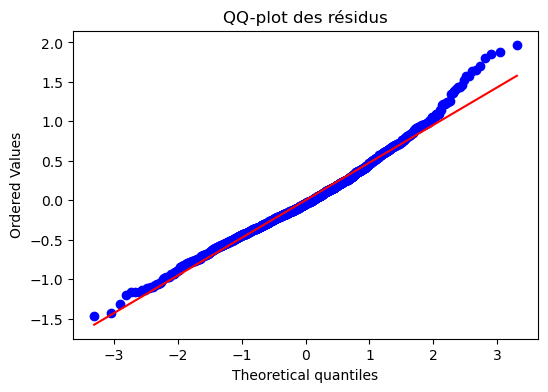

In [27]:
# J'affiche le resultat dans un graphique 
import scipy.stats as stats

# Tracer le QQ-plot
fig, ax = plt.subplots(figsize=(6, 4))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-plot des résidus")
plt.show()

#### Commentaire :
Visuellement, les résidus ne suivent pas une distribution normale, les points au niveau des extremités ne sont pas exactement alignés sur la droite.  

## 6. Imputation 

#### Malgré le rejet des tests de normalité des résidus et d'homoscédasticité, et la vérification concluante uniquement du test de non-collinéarité, j'ai décidé d'utiliser les résultats du modèle de régression linéaire pour la suite, en particulier pour les opérations d'imputation.

In [28]:
# J'affiche les informations sur la distribution des valeurs de la variable "margin_low," sans les valeurs prédites du model de régression Linéaire
display(df[["margin_low"]].describe())

,margin_low
count,1463.000000
mean,4.485967
std,0.663813
min,2.980000
25%,4.015000
50%,4.310000
75%,4.870000
max,6.900000


In [29]:
# Je mets à jour le df avec les valeurs prédites
ensemble_test['margin_low'] = valeurs_predites

# Je concatene l'ensemble d'entraînement et l'ensemble de test pour obtenir le df final
dff = pd.concat([ensemble_entrainement, ensemble_test])

In [30]:
# J'affiche les informations sur la distribution des valeurs de la variable "margin_low," avec les valeurs predites du modèl de Régression Linéaire
display(dff[["margin_low"]].describe())

,margin_low
count,1500.000000
mean,4.482844
std,0.659899
min,2.980000
25%,4.027500
50%,4.310000
75%,4.870000
max,6.900000


#### Il n'y a pas de grandes différences dans la distribution de la variable cible après avoir remplacer les NAN par les valeurs prédites.

## 7.1 Régression logistique 

In [31]:
# Je divise les données en ensembles d'entraînement et de test
X = dff.drop('is_genuine', axis=1)
y = dff['is_genuine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Je crée et ajuste le modèle de régression logistique
model_log = LogisticRegression()
model_logg = model_log.fit(X_train, y_train)

# J'effectue des prédictions sur l'ensemble de test
y_pred = model_log.predict(X_test)

from sklearn.metrics import f1_score
# Je calcule le F1 score
f1 = f1_score(y_test, y_pred)

print("F1 Score:", round(f1 * 100, 2), "%")

F1 Score: 99.2 %


### 7.2 Matrice de confusion 

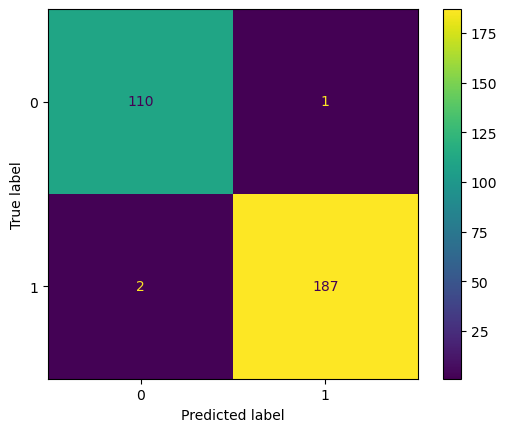

In [32]:
MCR = confusion_matrix(y_test, y_pred)
R = ConfusionMatrixDisplay(confusion_matrix=MCR)
R.plot()
plt.show()

In [33]:
# J'affiche le résultat en extrayant  les valeurs de la matrice de confusion
vn, fp, fn, vp = MCR.ravel()

print("Vrais négatifs :", vn)
print("Faux positifs :", fp)
print("Faux négatifs :", fn)
print("Vrais positifs :", vp)

Vrais négatifs : 110
Faux positifs : 1
Faux négatifs : 2
Vrais positifs : 187


## 8.1 K-Means 

In [34]:
# Je divise les données en ensembles d'entraînement et de test
X = dff.drop('is_genuine', axis=1)
y = dff['is_genuine']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Je crée et ajuste le modèle K-Means
nombre_clusters = 2  # Supposons que nous voulons 2 clusters
kmeans = KMeans(n_clusters=nombre_clusters, random_state=0)
model_km = kmeans.fit(X_train)

# Je predis les clusters sur les données de test
clusters = kmeans.predict(X_test)

# Je calcule le F1 score en utilisant les clusters pour la classification binaire

f1 = f1_score(y_test, clusters)

print("F1 Score:",round(f1 * 100, 2), "%")

F1 Score: 98.69 %


### 8.2 Matrice de confusion

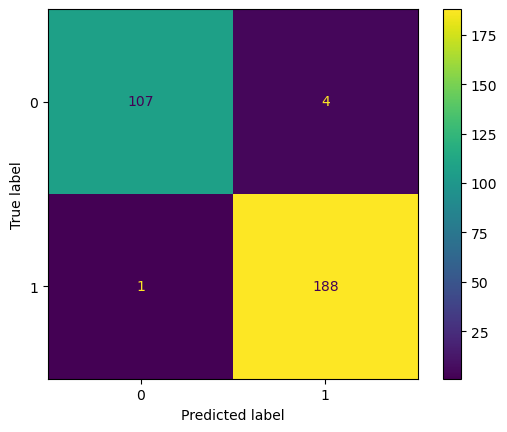

In [35]:
MCK = confusion_matrix(y_test, clusters)
K = ConfusionMatrixDisplay(confusion_matrix=MCK)
K.plot()
plt.show()

In [36]:
# J'affiche le résultat en extrayant  les valeurs de la matrice de confusion
vn, fp, fn, vp = MCK.ravel()

print("Vrais négatifs :", vn)
print("Faux positifs :", fp)
print("Faux négatifs :", fn)
print("Vrais positifs :", vp)

Vrais négatifs : 107
Faux positifs : 4
Faux négatifs : 1
Vrais positifs : 188


## 9. Modèle retenu
Les performances des modèles de Régression Logistique et de K-Means suggèrent que la Régression Logistique est le choix optimal pour la détection de faux billets. La Régression Logistique a démontré une performance supérieure, avec une F1-Score de 99.2% sur les données de test, comparé à 98.69% pour le K-Means.

Plus spécifiquement, la Régression Logistique n'a identifié qu'un seul faux positif, cela signifie que le modèle a fait moins d'erreurs en classifiant à tort des billet négatifs comme positifs tandis que le modèle K-Means en a signalé quatre. Ces résultats renforcent la robustesse et l'efficacité de la Régression Logistique dans la discrimination entre vrais et faux billets.

## 10. Automatisation : 

In [37]:
# Fonction pour l'utilisation du modèle retenu (Régression logistique)
def test_model(csv_file_path):
    # Je charge le nouveau fichier CSV
    new_data = pd.read_csv(csv_file_path)
    
    # Je sépare les fonctionnalités (X_new) de la cible (y_pred_new)
    X_new = new_data.drop('id', axis=1)
    
    # J'effectue les prédictions sur le nouveau jeu de données
    y_pred_new = model_log.predict(X_new)
    
    # Je convertiq le tableau NumPy en DataFrame
    y_pred_df = pd.DataFrame(y_pred_new, columns=['Prédiction'])
    
    # Je calcule les probabilités associées aux prédictions
    proba = model_log.predict_proba(X_new)
    
    # J'ajoute la colonne 'Probabilité' au DF en affichant la probabilité vraie
    new_data['Probabilité'] = proba[:, 1].round(2)
    
    # J'ajoute la colonne 'Prédiction' au DF et je remplace 1 par 'Vrai' et 0 par 'Faux'
    new_data['Prédiction'] = y_pred_df['Prédiction'].replace({1: 'Vrai', 0: 'Faux'})
    
    # Je definis les ID comme index
    new_data.set_index('id', inplace=True)
    
    # Je retourne les valeurs prédites avec 'Prédiction', 'Probabilité', et les dimensions géographiques
    return new_data[['diagonal', 'height_left', 'height_right', 'margin_low', 'margin_up', 'length', 'Prédiction', 'Probabilité',]]


### Test : 

In [38]:
# Je charge le ficher csv sur lequel je vais effectuer le test
df2 = pd.read_csv('billets_production.csv')
df2

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [41]:
# Exemple d'utilisation de la fonction pour tester le nouveau fichier CSV
new_csv_file_path = "C:\\Users\\halim\\OneDrive\\Bureau\\Projet 10\\billets_test.csv"
resultats = test_model(new_csv_file_path)
resultats

,diagonal,height_left,height_right,margin_low,margin_up,length,Prédiction,Probabilité
id,,,,,,,,
B_1,172.09,103.95,103.73,4.39,3.09,113.19,Vrai,0.99
B_2,171.52,104.17,104.03,5.27,3.16,111.82,Faux,0.01
B_3,171.78,103.80,103.75,3.81,3.24,113.39,Vrai,1.00
B_4,172.02,104.08,103.99,5.57,3.30,111.10,Faux,0.00
B_5,171.79,104.34,104.37,5.00,3.07,111.87,Faux,0.01


In [40]:
# J'enregistre la fonction pour pouvoir l'utiliser par la suite dans un nouveau notebook si necessaire 
import joblib

joblib.dump(test_model, 'test_model_function.joblib')

['test_model_function.joblib']